# Changing tastes

$$ \log D_t = \alpha + \beta_t \log p_t + \nu_t $$

$$ \beta_t = \rho \beta_{t-1} + (1-\rho)\bar{\beta} + \varepsilon_t $$

Is this enough to keep learning going on forever?



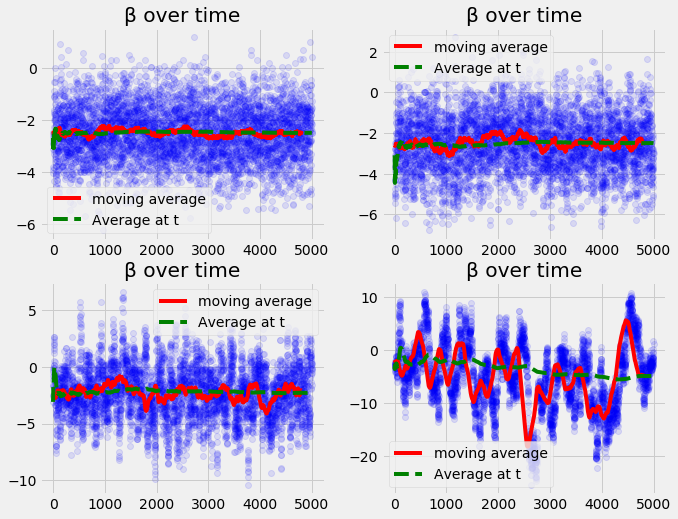

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

def moving_average(a, n) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def average_at_t(a):
    ret = np.cumsum(a, dtype=float)
    return ret/(np.arange(len(a))+1)

n = 5000
barβ, α = -2.5, 1.1
σɛ, σν =  0.3, 1.1

def simul(ρ):
    p = np.random.normal(loc=10, scale=2, size=n)
    ν = np.random.normal(loc=0, scale=1, size=n)
    b0 = -3.1
    betas = np.empty(n)
    betas[0] = b0
    for i_b in range(n-1):
        betas[i_b+1] = ρ*betas[i_b] + (1-ρ)*barβ + ν[i_b+1]
    
    beta_mov_average = moving_average(betas, n=200)
    beta_avg_at_t = average_at_t(betas)
    
    return betas, beta_mov_average, beta_avg_at_t
    
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharey=False)
axes = axes.flatten()

for i, rho in enumerate([0.3, 0.7, 0.9, 0.99]):
    betas, beta_mov_average, beta_avg_at_t = simul(rho)
    axes[i].plot(betas, 'bo', alpha=0.1)
    axes[i].set_title("β over time")
    axes[i].plot(beta_mov_average, 'r', label="moving average")
    axes[i].plot(beta_avg_at_t, 'g--', label="Average at t")
    axes[i].legend()

    